# Titanic

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew members.

This is a binary classification problem, where the target is whether a passenger or a crew member survided or not.


In [47]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Overview:

#### Part 1. EDA and Feature Engineering:
0) Dataset standard statistics

1) Individual features analysis 

2) Finding any relations or trends considering multiple features

3) Adding new features as a result of EDA

4) Removing redundant features


#### Part 2. Modeling:
1) Basic algorithms

2) K-fold Cross Validation

3) Hyperparameters optimization


# EDA

In [48]:
# Reading the datasets
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')
df_all = pd.concat([df_train, df_test])
df_all['Split'] = np.where(df_all['PassengerId'] <= np.max(df_train['PassengerId']), 'Train', 'Test')

In [49]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Split
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test


In [50]:
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print('Train columns \n', list(df_train.columns))
print('Test columns \n', list(df_test.columns))

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Train columns 
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Test columns 
 ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### **Features description**
* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target we need to predict:
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has only **3** unique values (**1**,  **2** or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

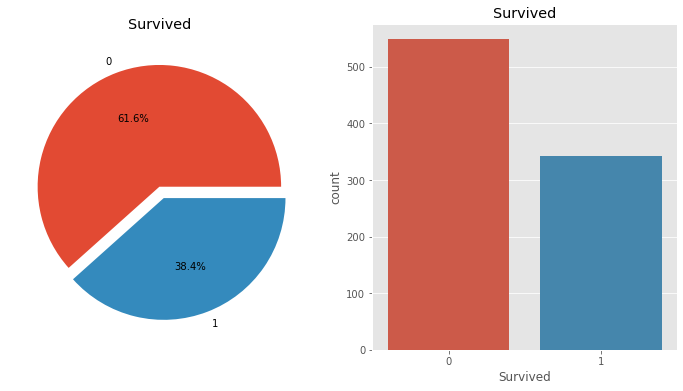

In [51]:
f, ax = plt.subplots(1, 2, figsize=(12,6))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

**EDA Insight 1.**

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. The target class disbalance is present. It's not extreme, but you probably need to use some sampling techniques to equalize the number of instances present in the training set.

In [52]:
print(df_train.info())
df_train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4,D28,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0,NaN,S


In [53]:
print(df_test.info())
df_test.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
351,1243,2,"Stokes, Mr. Philip Joseph",male,25.0,0,0,F.C.C. 13540,10.5000,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C
115,1007,3,"Chronopoulos, Mr. Demetrios",male,18.0,1,0,2680,14.4542,NaN,C


**EDA Insight 2.**

Mainly two features have NAN values: "Age" and "Cabin". "Fare" and "Embarked" have a few NaN values. Both train and test sets have NaN values in the same features thus we can't simply drop these observations. Otherwise we lose some performance because we didn't see NANs during the training process. Moreover, for "Cabin" there is only ~200 observations with meaningful values, dropping them will lead to significant data loss.

## Exploring features individually

#### **Sex**

In [54]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

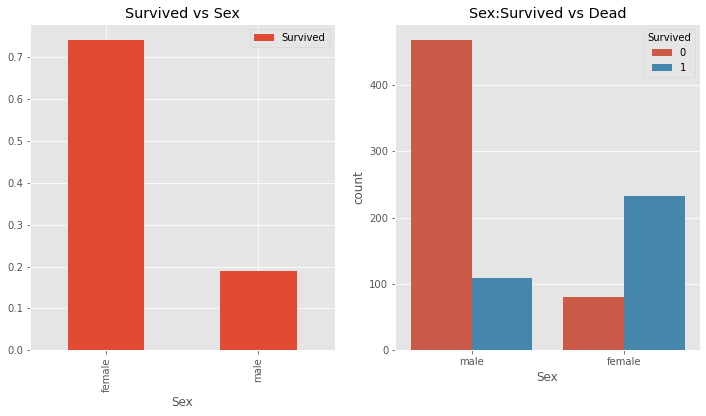

In [55]:
f,ax=plt.subplots(1, 2, figsize=(12,6))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

**EDA Insight 3.**

The number of men on the ship is lot more than the number of women. Interestingly, the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around **75%** while that for men is around **19%**.

Looks like an **important** feature.

### **Age**

In [56]:
print('Oldest Passenger was of', df_all['Age'].max(), 'Years')
print('Youngest Passenger was of', df_all['Age'].min(), 'Years')
print('Average Age on the ship:', round(df_all['Age'].mean(), 2), 'Years')

Oldest Passenger was of 80.0 Years
Youngest Passenger was of 0.17 Years
Average Age on the ship: 29.88 Years


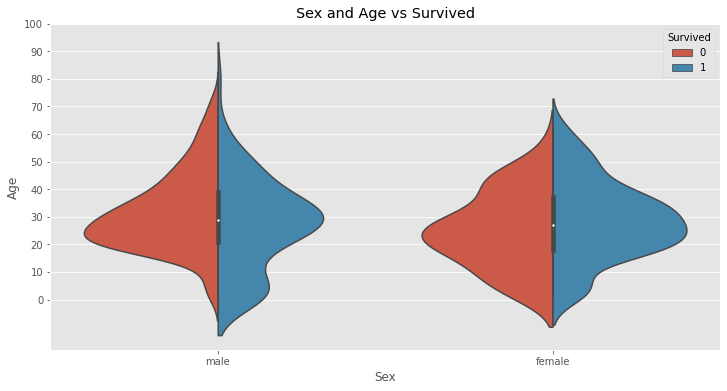

In [57]:
f, ax=plt.subplots(1, 1, figsize=(12, 6))
sns.violinplot("Sex", "Age", hue="Survived", data=df_train, split=True, ax=ax)
ax.set_title('Sex and Age vs Survived')
ax.set_yticks(range(0, 110, 10))
plt.show()

#### **NaN values imputation**

As we had seen earlier, the Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the dataset.

Would it be correct? We can't assign a 4 year kid with the mean age that is 30 years. Is there any way to find out what age-band does the passenger lie?

We can check the **Name**  feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

Don't forget that we have to apply the same transformations for both train and test sets!

In [58]:
def extract_initial(df):
    df['Initial'] = df['Name'].str.extract('([A-Za-z]+)\.')
    return df
    
df_all = extract_initial(df_all)

In [59]:
df_all.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Split,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,Miss


In [60]:
# Checking the Initials with the Sex
pd.crosstab(df_all['Initial'], df_all['Sex']).T

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [61]:
def fix_age_spelling(df):
    df['Initial'].replace(
        ['Mlle','Mme','Ms','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
        ['Miss','Miss','Miss','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],
        inplace=True
    )
    return df

df_all = fix_age_spelling(df_all)

In [62]:
pd.crosstab(df_all['Initial'], df_all['Sex']).T

Initial,Dr,Master,Miss,Mr,Mrs,Other
Sex,,,,,,
female,1,0,265,0,200,0
male,7,61,0,762,0,13


In [63]:
df_all.groupby('Initial')['Age'].agg(['median', 'count']).reset_index()

,Initial,median,count
0,Dr,49.0,7
1,Master,4.0,53
2,Miss,22.0,214
3,Mr,29.0,586
4,Mrs,36.0,173
5,Other,47.0,13


In [64]:
df_all.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Split,Initial
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test,Mrs
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test,Mr
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Test,Master


In [65]:
# Filling NaN values with median age by Initials
def impute_age(df):
    df['Age'] = df.groupby("Initial").transform(lambda x: x.fillna(x.median()))['Age']
    return df

df_all = impute_age(df_all)

In [66]:
df_all.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Split,Initial
413,1305,NaN,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,NaN,S,Test,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test,Mrs
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,NaN,S,Test,Mr
417,1309,NaN,3,"Peter, Master. Michael J",male,4.0,1,1,2668,22.3583,NaN,C,Test,Master


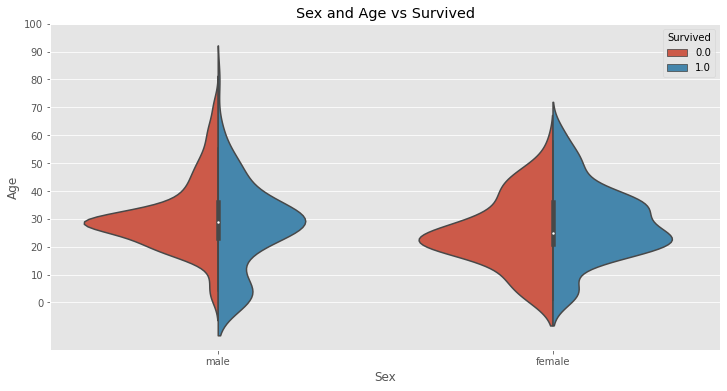

In [67]:
# After imputation
data = df_all[df_all['Split'] == 'Train']
f, ax=plt.subplots(1, 1, figsize=(12, 6))
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax)
ax.set_title('Sex and Age vs Survived')
ax.set_yticks(range(0, 110, 10))
plt.show()

Okay, now we fixed "Age" column. Let's move to the next feature.

### **Fare**

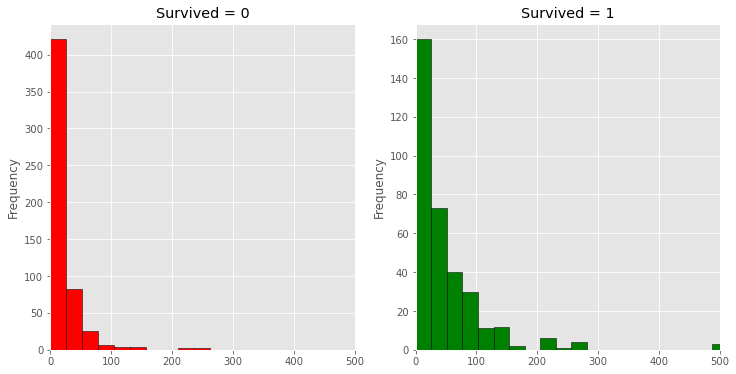

In [68]:
f,ax=plt.subplots(1,2,figsize=(12,6))
data[data['Survived']==0].Fare.plot.hist(ax=ax[0], color='red', bins=10, edgecolor='black')
ax[0].set_title('Survived = 0')
ax[0].set_xlim(0, 500)
data[data['Survived']==1].Fare.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
ax[1].set_xlim(0, 500)
plt.show()

Fare is another continous variable. Seems like the ticket price does not correlate clearly with the chance of survival. The rule Women and Children first was more influencial.

### **Pclass**

In [69]:
data = df_all[df_all['Split'] == 'Train']
pd.crosstab(data['Pclass'], data['Survived'], margins=True)

Survived,0.0,1.0,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


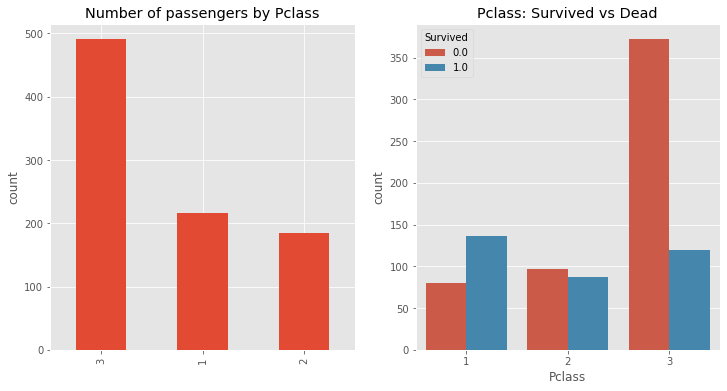

In [70]:
f,ax=plt.subplots(1, 2, figsize=(12, 6))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of passengers by Pclass')
ax[0].set_ylabel('count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

**EDA Insight 3.**

We can clearly see that passenegers of Pclass=1 were given a very high priority while rescue in comparison to Pclass=3.

This feature may contribute to accurate predictions.

### **Cabin**
The large portion of the `Cabin` feature is missing and the feature itself can't be ignored completely because some the cabins might have higher survival rates. The first letter of the `Cabin` values indicate the corresponding decks in which the cabins are located. Some decks were used by multiple passenger classes, while the most of decks were one-class only.

![alt text](https://vignette.wikia.nocookie.net/titanic/images/f/f9/Titanic_side_plan.png/revision/latest?cb=20180322183733)


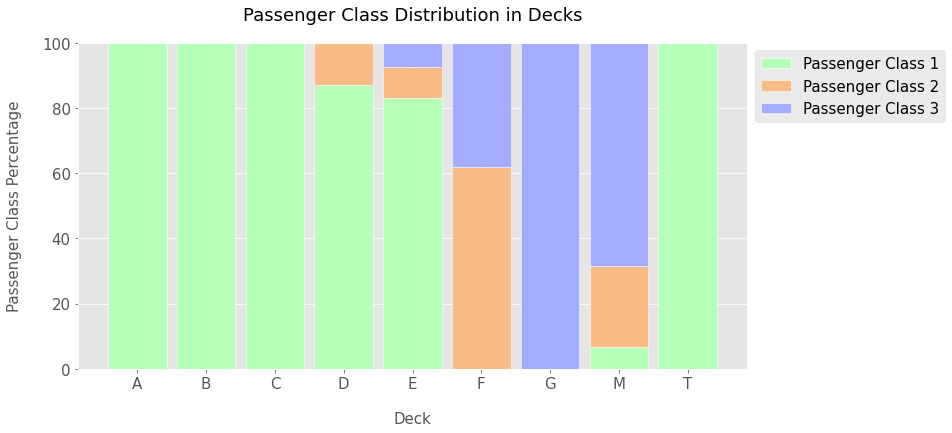

In [71]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(12, 6))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

* **A**, **B** and **C** decks were only for 1st class passengers
* **D** and **E** decks were for all classes
* **F** and **G** decks were for both 2nd and 3rd class passengers
* Distance to the staircase might be an important factor of survival

Let's calculate the survival rate for each of the decks to check whether there is any visual correspondence.

In [72]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Split,Initial,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,Mr,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,Miss,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train,Mr,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,NaN,S,Test,Mr,M
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test,Mrs,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test,Mr,M
416,1308,NaN,3,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,NaN,S,Test,Mr,M


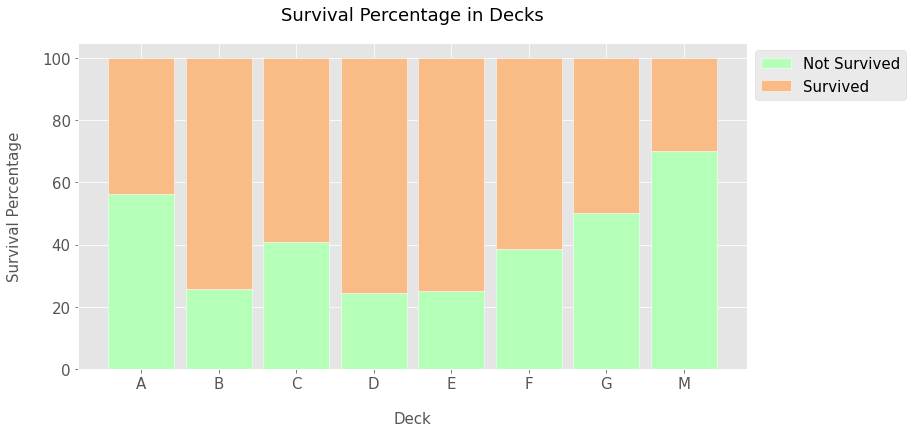

In [73]:
# Solely presented passenger in the T deck is changed to A
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(
    columns=['Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Pclass', 'Cabin', 'PassengerId']
).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(12, 6))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

**EDA Insight 4.**

Every deck has different survival rates and that information can't be discarded. Deck B, D and E, mostly occupied by 1st class passengers, have the highest survival rates. The Deck feature can be a good proxy for the distance to the staircase.


## Exploring features jointly


#### Feature correlations

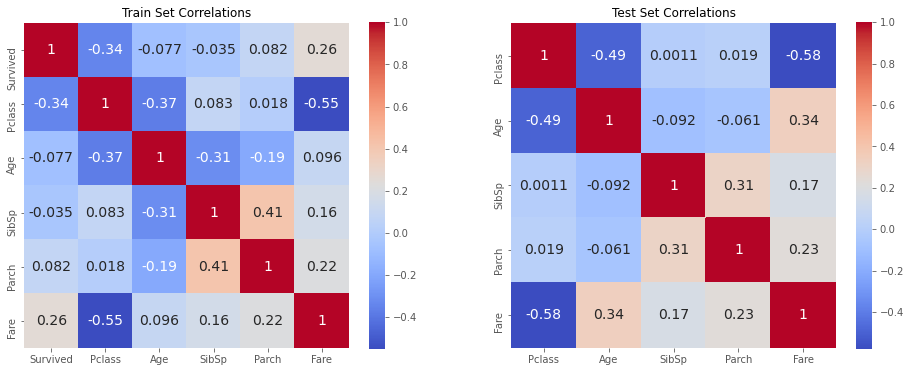

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(df_train.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(df_test.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=10)
    axs[i].tick_params(axis='y', labelsize=10)
    
axs[0].set_title('Train Set Correlations', size=12)
axs[1].set_title('Test Set Correlations', size=12)

plt.show()

As expected, features "Fare" and "Pclass" are highly correlated (corr_pearson = -0.58). The ticket price is lower if the class is higher (worse). Furthermore, "Pclass" correlates with "Age" probably because the facilities are of higher importance for older people.

#### **Sex and Pclass**

Let's analyse two strong features "Sex" and "Pclass" jointly and see whether it can give us more insights.

In [75]:
data = df_all[df_all['Split'] == 'Train']
pd.crosstab([data['Sex'], data['Survived']], data.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0.0         3    6   72   81
       1.0        91   70   72  233
male   0.0        77   91  300  468
       1.0        45   17   47  109
All              216  184  491  891

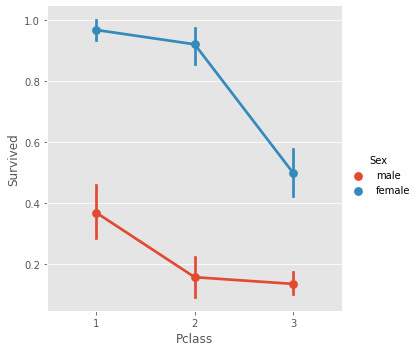

In [76]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even men from Pclass=1 have a lower survival rate than women from Pclass=3.

# Feature Engineering
In this section we will share some tricks to craft features from initial data to finally improve the performance of the same models.

In [77]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Split,Initial,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,Mr,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,Miss,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train,Mr,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,NaN,S,Test,Mr,M
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test,Mrs,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test,Mr,M
416,1308,NaN,3,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,NaN,S,Test,Mr,M


#### **Removing unnecessary columns**

In [78]:
df_all = df_all[[
    'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Split', 'Initial', 'Deck'
]]
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1308 non-null   float64
 8   Embarked  1307 non-null   object 
 9   Split     1309 non-null   object 
 10  Initial   1309 non-null   object 
 11  Deck      1309 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 165.2+ KB


#### Impute NaNs in "Fare" and "Embarked" 
For "Fare" we will use the average fare based on Pclass. 

Missing values in "Embarked" are imputed by the most frequent port for the corresponding deck type. 

In [79]:
df_all['Fare'] = df_all.groupby("Pclass").transform(lambda x: x.fillna(x.mean()))['Fare']
df_all['Embarked'] = df_all.groupby("Deck").transform(lambda x: x.fillna(x.mode()[0]))['Embarked']

In [80]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1309 non-null   float64
 8   Embarked  1309 non-null   object 
 9   Split     1309 non-null   object 
 10  Initial   1309 non-null   object 
 11  Deck      1309 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 165.2+ KB


In [81]:
df_all

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Split,Initial,Deck
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Train,Mr,M
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Train,Mrs,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Train,Miss,M
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Train,Mrs,C
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Train,Mr,M
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,29.0,0,0,8.0500,S,Test,Mr,M
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Test,Mrs,C
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Test,Mr,M
416,NaN,3,"Ware, Mr. Frederick",male,29.0,0,0,8.0500,S,Test,Mr,M


#### **Family size**

Family_Size is created by adding SibSp, Parch and 1. SibSp is the count of siblings and spouse, and Parch is the count of parents and children. Those columns are added in order to find the total size of families.

In [82]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

In [83]:
df_all

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Split,Initial,Deck,Family_Size
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Train,Mr,M,2
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Train,Mrs,C,2
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Train,Miss,M,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Train,Mrs,C,2
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Train,Mr,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,29.0,0,0,8.0500,S,Test,Mr,M,1
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Test,Mrs,C,1
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Test,Mr,M,1
416,NaN,3,"Ware, Mr. Frederick",male,29.0,0,0,8.0500,S,Test,Mr,M,1


#### **Family survival rate**
Let's write an easy function that parses family names and use this data to construct a new feature. For this feature we use **Target Encoding**, because the survival rate for a family depends on the labels of its members.

In [84]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

df_all['Family'] = extract_surname(df_all['Name'])

`Family_Survival_Rate` is calculated from families in training set since there is no `Survived` feature in test set. A list of family names that are occuring in both training and test set (`non_unique_families`), is created. The survival rate is calculated for families with more than 1 members in that list, and stored in `Family_Survival_Rate` feature.

An extra binary feature `Family_Survival_Rate_NA` is created for families that are unique to the test set. This feature is also necessary because there is no way to calculate those families' survival rate. This feature implies that family survival rate is not applicable to those passengers because there is no way to retrieve their survival rate.


In [85]:
# We have to separate train and test because the processing for them differs

df_train = df_all[df_all['Split'] == 'Train']
df_test = df_all[df_all['Split'] == 'Test']

# Creating a list of families that are occuring in both training and test set
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]

df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family', 'Family_Size'].median()
family_rates = {}

for i in range(len(df_family_survival_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

In [86]:
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

In [87]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Split,Initial,Deck,Family_Size,Family,Family_Survival_Rate,Family_Survival_Rate_NA
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Train,Mr,M,2,Braund,0.383838,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Train,Mrs,C,2,Cumings,1.000000,1
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Train,Miss,M,1,Heikkinen,0.383838,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Train,Mrs,C,2,Futrelle,0.383838,0
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Train,Mr,M,1,Allen,0.383838,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Train,Other,M,1,Montvila,0.383838,0
887,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Train,Miss,B,1,Graham,0.383838,0
888,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,23.4500,S,Train,Miss,M,4,Johnston,0.000000,1
889,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Train,Mr,C,1,Behr,0.383838,0


In [88]:
df_test

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Split,Initial,Deck,Family_Size,Family,Family_Survival_Rate,Family_Survival_Rate_NA
0,NaN,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Test,Mr,M,1,Kelly,0.383838,0
1,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Test,Mrs,M,2,Wilkes,0.383838,0
2,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Test,Mr,M,1,Myles,0.383838,0
3,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Test,Mr,M,1,Wirz,0.383838,0
4,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Test,Mrs,M,3,Hirvonen,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,29.0,0,0,8.0500,S,Test,Mr,M,1,Spector,0.383838,0
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Test,Mrs,C,1,Oliva y Ocana,0.383838,0
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Test,Mr,M,1,Saether,0.383838,0
416,NaN,3,"Ware, Mr. Frederick",male,29.0,0,0,8.0500,S,Test,Mr,M,1,Ware,0.383838,0


#### **Label Encoding Non-Numerical Features**
`Embarked`, `Sex`, `Deck` , and `Initial` are object type, and `Age` and `Fare` features are category type. They are converted to numerical type with `LabelEncoder`. `LabelEncoder` basically labels the classes from **0** to **n**. This process is necessary for models to learn from those features.

In [89]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Initial', 'Age', 'Fare']

for feature in non_numeric_features:        
    df_train[feature] = LabelEncoder().fit_transform(df_train[feature])
    df_test[feature] = LabelEncoder().fit_transform(df_test[feature])

In [90]:
df_test

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Split,Initial,Deck,Family_Size,Family,Family_Survival_Rate,Family_Survival_Rate_NA
0,NaN,3,"Kelly, Mr. James",1,45,0,0,24,1,Test,3,7,1,Kelly,0.383838,0
1,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,61,1,0,5,2,Test,4,7,2,Wilkes,0.383838,0
2,NaN,2,"Myles, Mr. Thomas Francis",1,75,0,0,41,1,Test,3,7,1,Myles,0.383838,0
3,NaN,3,"Wirz, Mr. Albert",1,35,0,0,34,2,Test,3,7,1,Wirz,0.383838,0
4,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,28,1,1,46,2,Test,4,7,3,Hirvonen,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",1,38,0,0,31,2,Test,3,7,1,Spector,0.383838,0
414,NaN,1,"Oliva y Ocana, Dona. Fermina",0,52,0,0,155,0,Test,4,2,1,Oliva y Ocana,0.383838,0
415,NaN,3,"Saether, Mr. Simon Sivertsen",1,51,0,0,9,2,Test,3,7,1,Saether,0.383838,0
416,NaN,3,"Ware, Mr. Frederick",1,38,0,0,31,2,Test,3,7,1,Ware,0.383838,0


In [91]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Split,Initial,Deck,Family_Size,Family,Family_Survival_Rate,Family_Survival_Rate_NA
0,0.0,3,"Braund, Mr. Owen Harris",1,28,1,0,18,2,Train,3,7,2,Braund,0.383838,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,51,1,0,207,0,Train,4,2,2,Cumings,1.000000,1
2,1.0,3,"Heikkinen, Miss. Laina",0,34,0,0,41,2,Train,2,7,1,Heikkinen,0.383838,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,47,1,0,189,2,Train,4,2,2,Futrelle,0.383838,0
4,0.0,3,"Allen, Mr. William Henry",1,47,0,0,43,2,Train,3,7,1,Allen,0.383838,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,"Montvila, Rev. Juozas",1,35,0,0,85,2,Train,5,7,1,Montvila,0.383838,0
887,1.0,1,"Graham, Miss. Margaret Edith",0,24,0,0,153,2,Train,2,1,1,Graham,0.383838,0
888,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28,1,2,131,2,Train,2,7,4,Johnston,0.000000,1
889,1.0,1,"Behr, Mr. Karl Howell",1,34,0,0,153,0,Train,3,2,1,Behr,0.383838,0


#### **One-Hot Encoding the Categorical Features**
The categorical features (`Sex`, `Deck`, `Embarked`, `Initial`) are converted to one-hot encoded features with `OneHotEncoder`. `Age`, `Fare`, and `Pclass` features are not converted because they are ordinal unlike the previous ones.

In [92]:
cat_features = ['Sex', 'Deck', 'Embarked', 'Initial']
encoded_features = []

for df in [df_train, df_test]:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:4]], axis=1)
df_test = pd.concat([df_test, *encoded_features[4:]], axis=1)

In [93]:
# Finalize the feature set
df_all = pd.concat([df_train, df_test])
drop_cols = ['Deck', 'Embarked', 'Family', 'Name', 'Parch', 'Sex',
             'SibSp', 'Initial']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

,Survived,Pclass,Age,Fare,Split,Family_Size,Family_Survival_Rate,Family_Survival_Rate_NA,Sex_1,Sex_2,...,Deck_8,Embarked_1,Embarked_2,Embarked_3,Initial_1,Initial_2,Initial_3,Initial_4,Initial_5,Initial_6
0,0.0,3,28,18,Train,2,0.383838,0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1,51,207,Train,2,1.000000,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,3,34,41,Train,1,0.383838,0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1,47,189,Train,2,0.383838,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,3,47,43,Train,1,0.383838,0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Part 2. Predictive Modeling

In [94]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [96]:
df_all

,Survived,Pclass,Age,Fare,Split,Family_Size,Family_Survival_Rate,Family_Survival_Rate_NA,Sex_1,Sex_2,...,Deck_8,Embarked_1,Embarked_2,Embarked_3,Initial_1,Initial_2,Initial_3,Initial_4,Initial_5,Initial_6
0,0.0,3,28,18,Train,2,0.383838,0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1,51,207,Train,2,1.000000,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,3,34,41,Train,1,0.383838,0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1,47,189,Train,2,0.383838,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,3,47,43,Train,1,0.383838,0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,38,31,Test,1,0.383838,0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
414,NaN,1,52,155,Test,1,0.383838,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
415,NaN,3,51,9,Test,1,0.383838,0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
416,NaN,3,38,31,Test,1,0.383838,0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
data = df_all[df_all['Split'] == 'Train']
del(data['Split'])

train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Linear Support Vector Machine(linear-SVM)

In [103]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8432835820895522


### Logistic Regression

In [104]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8507462686567164


### Random Forest

In [105]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forest is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forest is 0.8395522388059702


## Cross-Validation

In [107]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Logistic Regression','Random Forest']
models=[svm.SVC(kernel='linear'),LogisticRegression(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.844052,0.037856
Logistic Regression,0.849652,0.036417
Random Forest,0.828291,0.018243


## Hyperparameters Optimization

In [108]:
from sklearn.model_selection import GridSearchCV
C=[0.1, 0.3, 0.5, 0.8, 1]
gamma=[0.1, 0.5, 1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.843945766116377
SVC(C=0.1, gamma=0.1, kernel='linear')


In [109]:
n_estimators=range(100, 1200, 200)
max_depth=range(5, 14, 1)

hyper={'n_estimators':n_estimators, 'max_depth': max_depth}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
0.851829765865294
RandomForestClassifier(max_depth=6, n_estimators=300, random_state=0)


### Disclaimer

This tutorial used some ideas and code from public Kaggle kernels. 

For example,

https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial/data

https://www.kaggle.com/ash316/eda-to-prediction-dietanic

https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering

https://www.kaggle.com/dlarionov/feature-engineering-xgboost